In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

df_results = pd.read_excel('../data/raw/result.xlsx')

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

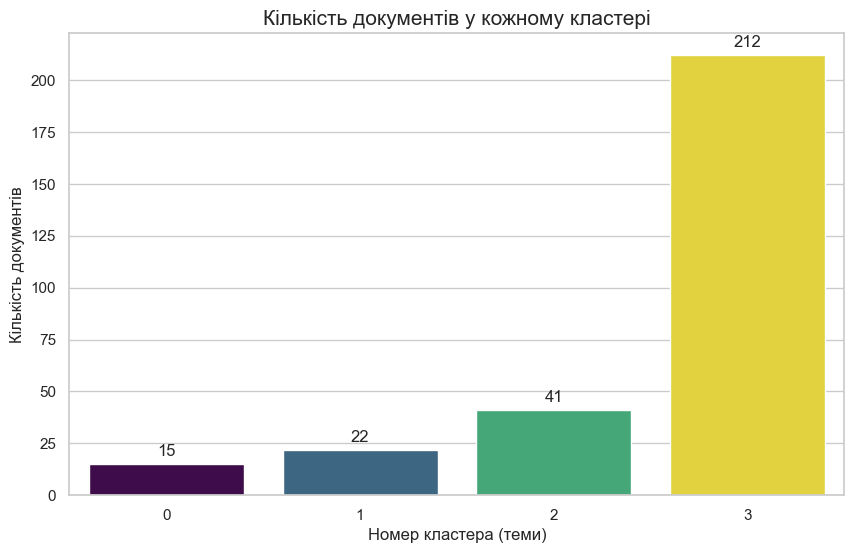

In [36]:
plt.figure(figsize=(10, 6))


ax = sns.countplot(
    data=df_results, 
    x='Група_документа', 
    hue='Група_документа', 
    palette='viridis', 
    legend=False
)
plt.title('Кількість документів у кожному кластері', fontsize=15)
plt.xlabel('Номер кластера (теми)', fontsize=12)
plt.ylabel('Кількість документів', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

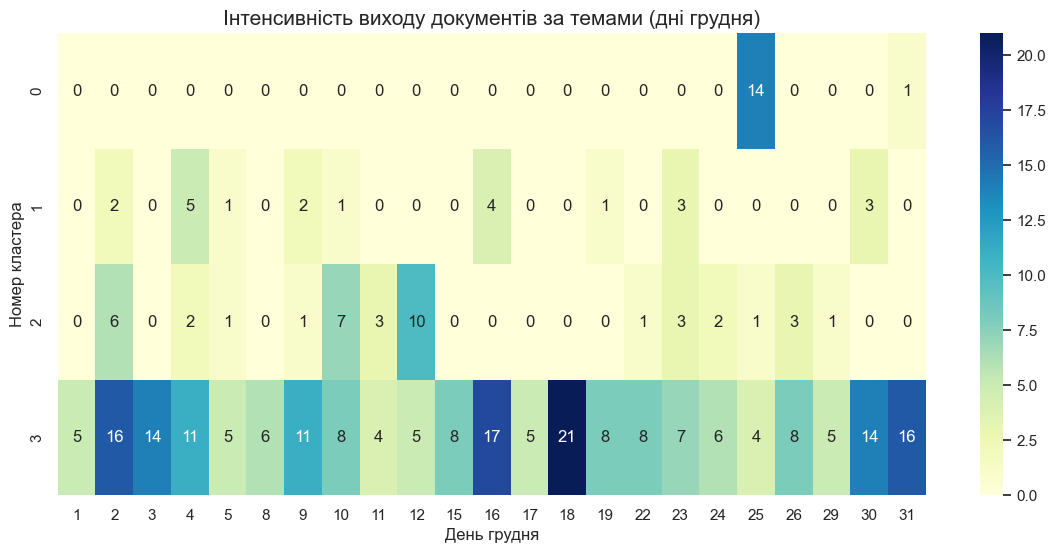

In [37]:
date_col = 'Дата\nреєстрації'
df_results[date_col] = pd.to_datetime(df_results[date_col])

pivot_table = df_results.pivot_table(
    index='Група_документа', 
    columns=df_results[date_col].dt.day, 
    values=df_results.columns[0], 
    aggfunc='count'
).fillna(0)

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g')

plt.title('Інтенсивність виходу документів за темами (дні грудня)', fontsize=15)
plt.xlabel('День грудня', fontsize=12)
plt.ylabel('Номер кластера', fontsize=12)

plt.show()

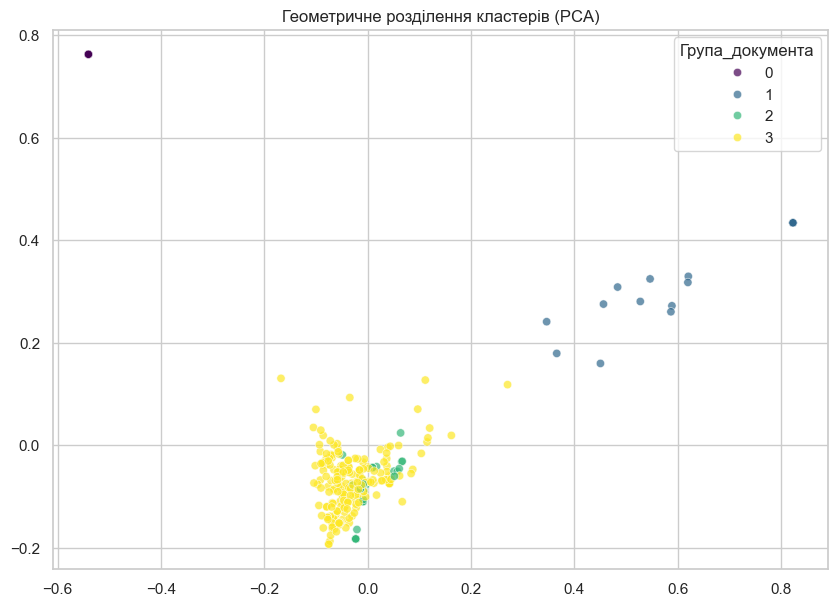

In [38]:


vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df_results['Короткий зміст'].astype(str))
pca = PCA(n_components=2)
coords = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=coords[:, 0], y=coords[:, 1], 
    hue=df_results['Група_документа'], 
    palette='viridis', alpha=0.7
)
plt.title('Геометричне розділення кластерів (PCA)')
plt.show()

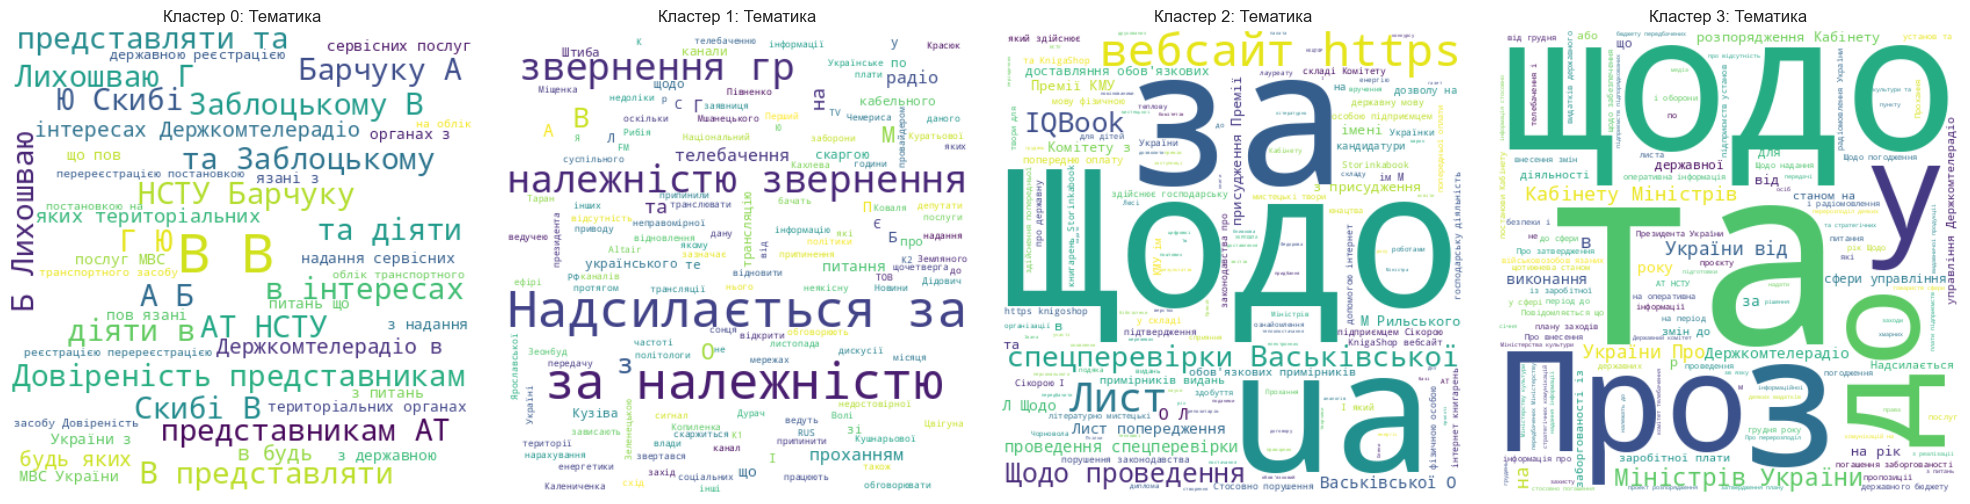

In [39]:
from wordcloud import WordCloud

num_clusters = df_results['Група_документа'].nunique()
fig, axes = plt.subplots(1, num_clusters, figsize=(5 * num_clusters, 5))

if num_clusters == 1: axes = [axes]

for i in range(num_clusters):
    subset = df_results[df_results['Група_документа'] == i]
    text = " ".join(subset['Короткий зміст'].astype(str))
    
    if text.strip():
        wc = WordCloud(width=400, height=400, background_color='white').generate(text)
        axes[i].imshow(wc, interpolation='bilinear')
        axes[i].set_title(f'Кластер {i}: Тематика')
    axes[i].axis('off')

plt.tight_layout()
plt.show()